<a href="https://colab.research.google.com/github/AlexandraLJones/FIRE-CloudComputing/blob/main/ASN10_2_Final_Product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Supervised Machine Learning for Cloud Type Classification from NASA GLOBE Observations**
---
## Team Stratus - John Le, Maia Brydon, Anoop Patta

#Introduction
---

The goal of our project was to use supervised machine learning to classify images of clouds taken by citizen scientists within the NASA GLOBE Observations data set. As explained in detail below, we accomplished this by using tools such as Google Colaboratory and Google Teachable Machine to clean and extract from our data set and train and analyze our model.

The 10 cloud types we would like to classify our images by are the following:

Altocumulus, Altostratus, Cirrocumulus, Cirrostratus, Cirrus, Cumulonimbus, Cumulus, Nimbostratus, Stratocumulus, Stratus.


###We split our procedure into 3 deliverable modules:
---


1.   **Deliverable 1**: This deliverable focused on cleaning our data as best as possible, so that we would only use the most accurately labeled data to train our algorithm. This is especially important because the accuracy of the algorithm is largely dependent on the quality of the training data. We retained the data that was valid (if the citizen scientist was trained and knew how to take proper observations). Beyond that we got rid of all columns except for the columns containing links of images of the clouds regardless of the direction they were taken at. We then took these links and applied code that would download them for us in folders based on their corresponding cloud type that the observer listed. These images can be found in /FIRE298/Stratus/Cloud Photos/

2.   **Deliverable 2**: This deliverable focused on training Teachable Machine to distinguish different cloud types from inputted sample images. The goal of this deliverable was to reach a base accuracy for us to improve upon later through parameter adjustments and additional training. We used 200 images for each class from our previous deliverable. The classes were the 10 different cloud types, and the parameters were default. We trained the algorithm using images that may have multiple different cloud types and obstructions in them, despite only having 10 classes for the single cloud types. Because Teachable Machine is relatively easy to use, this allowed us to quickly train a model and ascertain a baseline for accuracy that we could then build on.

3. **Deliverable 3:** This deliverable focused on comparing Teachable Machine models accuracy based on mixed and pure cloud type images and different epoch and learning rates. The goal of this deliverable was to compare how accurate each model was and make hypotheses as to what variables allow for certain cloud types to consistently underperform and how we could improve our results. When comparing the different epoch and learning rates, we used 200 pure cloud type images per class as it was more accurate compared to the mixed cloud types, which we will be further explained below.

## Deliverable 1: Cleaning the Citizen Scientist Data

---


In order for us to have input for our Teachable Machine, we first have to parse the GLOBE Observation CSV files, extract the URLs of each of the cloud images, and download the images to Google Drive. We do this dataset manipulation through Google Colab itself.

First, we grant access to Google Drive so that we have access to the CSV files, and import the packages needed for working with the data.

In [ ]:
from google.colab import drive #this module allows us to access files on google drive
drive.mount('/content/gdrive', force_remount=True) #you will need to authorize access using your google account. Follow the instructions that appear below
import pandas as pd #this allows us to use structures like Dataframes
import matplotlib.pyplot as plt #this is our plotting package
import numpy as np #this allows us to do math with arrays easier

Mounted at /content/gdrive


Here, we read in the CSV files for each year there are GLOBE observations for.

In [ ]:
#datasets to be used for project sample images (pkl files don't have updated column headers)
globe2017 = pd.read_csv("/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/2017GLOBEclouddata.csv", index_col = False)
globe2018 = pd.read_csv("/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/2018GLOBEclouddata.csv", index_col = False)
globe2019 = pd.read_csv("/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/2019GLOBEclouddata.csv", index_col = False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,10,42,43,44,45,46,47,51,52,53,54,55,56,59,60,61,87,90,91,113,116,117) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (51,52,53,54,55,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


We make arrays of the important column labels that may be needed later, for easy access.

In [ ]:
globe2017

,Observation Number,Is GLOBE Trained,is Citizen Science,Site ID,Observation Latitude,Observation Longitude,Observation Elevation,Measurement Date (UTC),Measurement Time (UTC),Sky Color,...,Aqua High Cloud Altitude,Aqua High Cloud Opt,Aqua High Cloud Cover,Aqua High Cloud Phase,Aqua High Cloud Temp (K),Aqua Sat Vzen,Aqua Sat Szen,Aqua Wind,Aqua Snow,Aqua Ocean
0,743703,0,1,145075,37.733360,-121.722141,169.0,2017-08-21,17:17:00,light blue,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000
1,743704,0,1,35910,40.034366,-105.243797,1611.1,2017-10-25,21:19:00,blue,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000
2,746063,1,1,145375,39.948563,-105.328948,2210.5,2017-08-21,14:42:00,blue,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000
3,746064,1,1,76611,39.974749,-105.307994,2205.9,2017-08-21,15:25:00,blue,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000
4,746065,1,1,78334,39.968451,-105.304453,2254.4,2017-08-21,15:53:00,blue,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127396,9804,1,0,33526,46.288182,16.335234,202.0,2017-01-30,11:00:00,-99,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000
127397,9805,1,0,33806,38.119800,23.866100,381.0,2017-01-30,11:10:00,-99,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000
127398,9806,1,0,5144,46.300264,16.328929,120.0,2017-01-30,11:20:00,-99,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000
127399,9807,1,0,32202,45.682400,18.404300,93.0,2017-01-30,11:29:00,-99,...,0.0,0.0,0.0,0.0,0.0,22.4769,63.6812,3.0414,0.0625,0.3125


In [ ]:
#important/basic columns
globe = ["Is GLOBE Trained"]
citizen = globe2017[["is Citizen Science"]]      
cloud_types = ["Cirrus", "Cirrocumulus", "Cirrostratus", "Altostratus", "Altocumulus", "Cumulus", "Nimbostratus", "Stratus", "Stratocumulus", "Cumulonimbus"]
images = ["Ground Image North", "Ground Image East", "Ground Image South", "Ground Image West", "Ground Image Up"]

Here, we filter out all of the data that wasn't collected by GLOBE trained citizen scientists in order to use better quality data. Then, for ease of use when creating our classes in Teachable Machine, a dataframe for each cloud type has been made. Each dataframe contains four columns of image links (ground images from each cardinal direction).
It should be noted that the null values (-99) haven't been filtered out of the data before putting them into the cloud type dataframe. The next code block shows an example of how we would do this.

In [ ]:
#only using data from GLOBE trained citizen scientists to assure better labeling
full_dataset = pd.concat([globe2017, globe2018, globe2019])
dataset = full_dataset.loc[full_dataset["Is GLOBE Trained"] == 1]

#creating a dataframe of image links for each cloud type
cirrus_images = dataset.loc[(dataset["Cirrus"] == 1), images];
cirrocumulus_images = dataset.loc[(dataset["Cirrocumulus"] == 1), images];
cirrostratus_images = dataset.loc[(dataset["Cirrostratus"] == 1), images];
altostratus_images = dataset.loc[(dataset["Altostratus"] == 1), images];
altocumulus_images = dataset.loc[(dataset["Altocumulus"] == 1), images];
cumulus_images = dataset.loc[(dataset["Cumulus"] == 1), images];
nimbostratus_images = dataset.loc[(dataset["Nimbostratus"] == 1), images];
stratus_images = dataset.loc[(dataset["Stratus"] == 1), images];
stratocumulus_images = dataset.loc[(dataset["Stratocumulus"] == 1), images];
cumulonimbus_images = dataset.loc[(dataset["Cumulonimbus"] == 1), images];

#example of one of the cloud type dataframes
print(dataset)
print(cirrus_images)

        Observation Number  Is GLOBE Trained  is Citizen Science  Site ID  \
2                   746063                 1                   1   145375   
3                   746064                 1                   1    76611   
4                   746065                 1                   1    78334   
5                   746066                 1                   1   145376   
6                   746067                 1                   1   145377   
...                    ...               ...                 ...      ...   
217222              959774                 1                   1    99185   
217229              959607                 1                   1   162623   
217230              959608                 1                   1   168782   
217237              959615                 1                   1   113101   
217239              959617                 1                   1   168782   

        Observation Latitude  Observation Longitude  Observation Elevation 

We now create a dataframe of the image links for each cloud type. We filter out the observations that have -99 or NULL in some of the columns based on the direction the image was not taken at.

In [ ]:
cirrus_images.iloc[0,0:5]

Ground Image North    -99
Ground Image East     -99
Ground Image South    -99
Ground Image West     -99
Ground Image Up       -99
Name: 5, dtype: object

In [ ]:
image_links = {'Cirrus': [],'Cirrocumulus': [],'Cirrostratus': [],'Altostratus': [],'Altocumulus': [],'Cumulus': [],'Nimbostratus': [],'Stratus': [],'Stratocumulus': [],'Cumulonimbus': []}
dataframes = [cirrus_images, cirrocumulus_images, cirrostratus_images, altostratus_images, altocumulus_images, cumulus_images, nimbostratus_images, stratus_images, stratocumulus_images, cumulonimbus_images]
key_list = list(image_links)

for index in range(10):
  for row in range(len(dataframes[index].index)):
    for col in range(0,5):
      link = dataframes[index].iloc[row, col]
      if link != '-99' and link != -99:
        image_links[key_list[index]].append(link)

From here, we import the necessary files in order to work with Google Drive to download each image in the corresponding cloud type folder and authenticate Google Drive.

In [ ]:
import requests
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Looping through the imagelinks dataset we created based on the cloud type, The code downloads 200 images per cloud type to test the code for now. In later iterations of this project, this number will change and we will use a greater sample size for testing. The while loop inside checks to make sure the link it's on in the iteration is valid and then writes it to the correct folder in Google Drive. This is done for 200 valid links (the inner loop) per each cloud type (the outer loop).

In [ ]:
for c_type in image_links:
  index = 0
  counter = 0
  while index < 200:
    index += 1
    r = requests.get(str(image_links[c_type][index])) 
    if r.status_code == 200:
      file_name = str(c_type) + str(counter) + '.jpg'
      counter += 1
      open(file_name, 'wb').write(r.content)
      folderName = str(c_type)  # sets the folder name to type of cloud
      folders = drive.ListFile(
      {'q': "title='" + folderName + "' and mimeType='application/vnd.google-apps.folder' and trashed=false"}).GetList()
      for folder in folders:
        if folder['title'] == folderName:
          file5 = drive.CreateFile({'parents': [{'id': folder['id']}]})
          file5.SetContentFile(file_name)#Read file and set its as a content of this instance.
          file5.Upload()
          print(file_name + " uploaded")

The result of this code can be found at /FIRE298/Stratus/Cloud Photos/ which has roughly 200 images per each cloud type organized in their respective folders. To the left are the folders organized. To the right is a sample of the images produced for the cloud type 'stratus'.

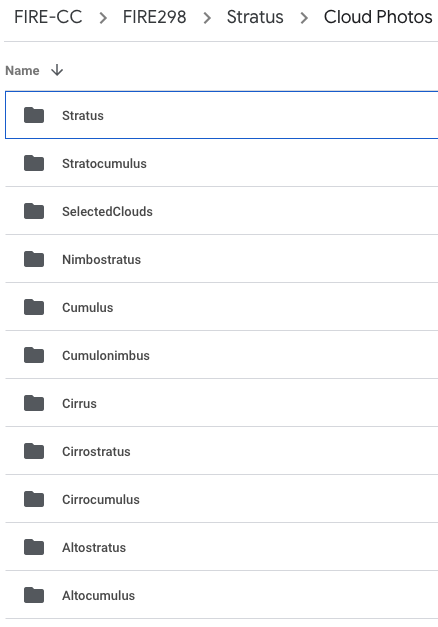 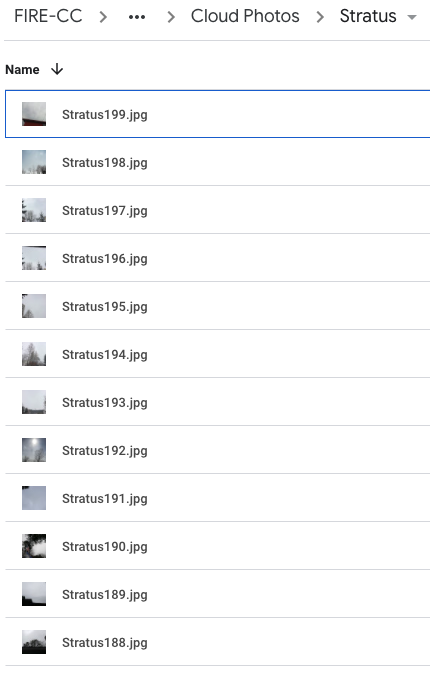

## Deliverable 2: Training Initial Model with Teachable Machine

For this deliverable, we trained a Teachable Machine model to distinguish different cloud types from inputted sample images. Our goal was to reach a base accuracy for us to improve upon later through parameter adjustments and additional training-- Teachable Machine allowed us to do this quickly and easily. Our sample images were the ground observation images we extracted from the cleaned GLOBE dataset from Deliverable 1. We used 200 images for each class during training; our classes were the 10 different cloud types, and we kept the model’s parameters (epochs, batch size, and the learning rate) as their default values. It’s important to note that we trained the algorithm using images that may have had multiple different cloud types and obstructions in them, despite only having 10 classes for the single cloud types. So, for example, an image could have stratus and cumulus clouds in it, and would be placed in both the stratus and cumulus classes. We took a further look at how that may have been a problem in Deliverable 3, during retraining. [Here is our initial trained Teachable Machine model.](https://teachablemachine.withgoogle.com/models/a4U9XRdqq/)

##Deliverable 3: Extracting Pure Cloud Type Images
In this deliverable, we attempted to improve our Teachable Machine accuracy results from the previous deliverable by extracting the pure cloud types from the mixed cloud type images. Our pure cloud type images are GLOBE Trained, and only have a '1' value for all images of a single cloud type. Each directional image (N/S/E/W/U) counts as an individual image. We saved these images to google drive, and inputted them into Teachable Machine in order to compare results between multiple cloud inclusive image samples and pure cloud type samples. We use the Requests HTTP library to gather the actual images from the image URL links, and write them into an image file to be stored in its appropriate folder using the Pydrive library. 

First, we created folders for every cloud type using the createFolders() function.

In [ ]:
def createFolders():
  cloud_folder_metadata = {'title' : 'Clouds', 'mimeType' : 'application/vnd.google-apps.folder'}
  cloud_folder = drive.CreateFile(cloud_folder_metadata)
  cloud_folder.Upload()
  cloud_folderid = cloud_folder['id']

  for cloudName in cloud_list:
    ct_folder_metadata = {'title' : cloudName, 'mimeType' : 'application/vnd.google-apps.folder', 'parents': [{'id': cloud_folderid}]}
    ct_folder = drive.CreateFile(ct_folder_metadata)
    ct_folder.Upload()
    clouds[cloudName] = ct_folder['id']
  print(clouds)

Then, we created the dataset() function to separate the pure cloud types from the datasets for each cloud type. Returns the GLOBE Trained dataframe with images that have '1' for only one cloud type.

In [ ]:
def dataset(cloud_dataset, specific):
  #removes the target cloud (param specific) from cloud dataset to get every other cloud type
  not_specific = cloud_dataset.drop(columns = specific)

  #checks if any columns have 1 (multiple cloud other than target cloud), false if no other clouds (which is what we want)
  check_multiple_clouds = pd.DataFrame(not_specific.any(axis='columns'), columns = ["cols"])

  #gets false values from above dataframe, represents the rows where there aren't multiple clouds 
  target_observations = check_multiple_clouds.loc[check_multiple_clouds["cols"] == False]

  #gets the rows from the overall dataset that correspond to not having multiple clouds (or had false in target_observations)
  no_multiples = cloud_dataset.iloc[target_observations.index]

  #indexes the rows that have no other clouds, and the target cloud is present (== 1)
  pure_clouds = no_multiples.loc[no_multiples[specific] == 1]

  #test with print(pure_clouds) to check rows for each cloud type "specific"

  return pure_clouds

  # print(cloud_dataset.columns.get_loc(specific)) #cirrus = 13 to cumulonimbus = 22

We create folders for each cloud type to store the dataset images. The folder id's are stored in the clouds dictionary as the value for each corresponding cloud type key. The images list represents the column names that we will be indexing for each GLOBE observation. 

In [ ]:
#dictionary for each folder, None will later be replaced with folder id of folders created
clouds = {'Cirrus': None , 'Cirrocumulus': None, 'Cirrostratus': None, 'Altostratus': None, 'Altocumulus': None, 'Cumulus': None, 'Nimbostratus': None, 'Stratus': None, 'Stratocumulus': None, 'Cumulonimbus': None}

#list of cloud types that are repreesnted as keys for cloud dictionary above
cloud_list = clouds.keys()
images = ["Ground Image North", "Ground Image East", "Ground Image South", "Ground Image West", "Ground Image Up"]

createFolders()

{'Cirrus': '1HY5TFu99HnjAsg8vW4TinknNXrvYB5r6', 'Cirrocumulus': '1V3ujRCnSDmTIfTc19uEfJdLo6jb48yuS', 'Cirrostratus': '1wNPSsdgWvR96qEGbqXpeB7Oq_IgUV5uY', 'Altostratus': '1OH_saFQSeWU2Vc1ndfvcBWejayuY3udG', 'Altocumulus': '1_BmJqfaUPbDPjXWzo9M0sFaIkdHQkIoY', 'Cumulus': '1PXEez9sXLBn2ql6twF314Jg7Mq4ed-LB', 'Nimbostratus': '14jWIC1Uvq4d8tl18-7mw9owq2Lk-inBY', 'Stratus': '1FDecGX8EikD_uQg8QKpvS_PThB-2XGPF', 'Stratocumulus': '1VgPq2lpK6Vpnq9urjZlc9U9g4L0T3nPE', 'Cumulonimbus': '1RJ_eDmaIfOtiV1IWQ-tH2xYbMXz-GPAE'}


To our dataset, we combined all three years (2017 - 2019), and will use only GLOBE trained observations because they are generally higher quality images that will be less likely to confuse our model. We extract only the cloud type columns for each GLOBE trained observation for the dataset() function in the list 'co' in order to obtain the pure cloud types. The 'io' list represents only the image links for each GLOBE trained observation. 

In [ ]:
#combine all 3 years
total_df = pd.concat([globe2017, globe2018, globe2019])

#extract gt (= globe trained)
gt = total_df.loc[total_df["Is GLOBE Trained"] == 1]

#reset index for later when aligning datasets
gt.reset_index(drop = True, inplace = True)

#isolates cloud types, will need to add columns for image links later, co = Cloud (types) Only
co = gt.iloc[:, 13:23]

#io = images only
#get ground image columns (n/e/s/w/u)
io = gt.iloc[:, 51:56]

#print(gt) #51 = north, 56 = down

In [ ]:
gt.iloc[:,51:56]

,Ground Image North,Ground Image East,Ground Image South,Ground Image West,Ground Image Up
0,-99,-99,-99,-99,-99
1,-99,-99,-99,-99,-99
2,-99,-99,-99,-99,-99
3,-99,-99,-99,-99,-99
4,-99,-99,-99,-99,-99
...,...,...,...,...,...
364016,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...
364017,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...
364018,-99,-99,-99,-99,-99
364019,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...


In [ ]:
io

,Ground Image North,Ground Image East,Ground Image South,Ground Image West,Ground Image Up
0,-99,-99,-99,-99,-99
1,-99,-99,-99,-99,-99
2,-99,-99,-99,-99,-99
3,-99,-99,-99,-99,-99
4,-99,-99,-99,-99,-99
...,...,...,...,...,...
364016,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...
364017,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...
364018,-99,-99,-99,-99,-99
364019,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...,https://data.globe.gov/system/photos/2019/12/3...


For each cloud type, we stored 200 pure cloud type images into the 'listlinks' list, and used the Requests library to get the contents of the image link to be the actual image. We wrote the image contents onto a file, and uploaded it to the proper cloud type file in Google Drive using Pydrive.

In [ ]:
for c in cloud_list:
  #list of image links
  listlinks = []

  #gets rows that have pure cloud types, from dataset() function
  io1 = io.iloc[dataset(co, c).index]
  #for each column, add all links that aren't invalid (equal to -99 or "-99")
  for i in images:
    io2 = io1.loc[(io1[i] != -99) & (io1[i] != "-99"), [i]]
    listlinks.extend(io2.values)

  listlinks = listlinks[:200]

  #counter is for naming each file by order of appearance
  counter = 0;
  
  #iterates through each valid link saved in listlinks
  for l in listlinks:
    #formats link to not have [] and '', which conflicts with request.get()
    link = ''.join(l)

    #gets data from about content for each link 
    data = requests.get(link)

    #fname = file name, format: cloud type#.jpg
    fname = c + str(counter) + '.jpg'
    counter += 1
    
    #writes the content of the link onto a file, with appropriate file name (wb = write, binary)
    open(fname, 'wb').write(data.content)

    #Creates and uploads the file in drive in appropriate folder (based on cloud name)
    file = drive.CreateFile({'parents': [{'id': clouds[c]}]})
    file.SetContentFile(fname)
    file.Upload()
    print(fname + " successfully uploaded!")

Cirrus0.jpg successfully uploaded!
Cirrus1.jpg successfully uploaded!
Cirrus2.jpg successfully uploaded!
Cirrus3.jpg successfully uploaded!
Cirrus4.jpg successfully uploaded!
Cirrus5.jpg successfully uploaded!
Cirrus6.jpg successfully uploaded!
Cirrus7.jpg successfully uploaded!
Cirrus8.jpg successfully uploaded!
Cirrus9.jpg successfully uploaded!
Cirrus10.jpg successfully uploaded!
Cirrus11.jpg successfully uploaded!
Cirrus12.jpg successfully uploaded!
Cirrus13.jpg successfully uploaded!
Cirrus14.jpg successfully uploaded!
Cirrus15.jpg successfully uploaded!
Cirrus16.jpg successfully uploaded!
Cirrus17.jpg successfully uploaded!
Cirrus18.jpg successfully uploaded!
Cirrus19.jpg successfully uploaded!
Cirrus20.jpg successfully uploaded!
Cirrus21.jpg successfully uploaded!
Cirrus22.jpg successfully uploaded!
Cirrus23.jpg successfully uploaded!
Cirrus24.jpg successfully uploaded!
Cirrus25.jpg successfully uploaded!
Cirrus26.jpg successfully uploaded!
Cirrus27.jpg successfully uploaded!
Ci

While running the code above, we faced an error that randomly popped up involving a client_secrets.json file. This error interrupted the image uploads, so we factory reset the colab session and manually restarted the file uploads for the specific images that were missing using the same code above. For our specific instance, the error stopped the upload at the image 'Stratocumulus145.jpg', so we continued from stratocumulus to cumulonimbus. Disclaimer: this error may appear at different times for different executions. 

In [ ]:
#random client_secrets.json error appearing during middle of upload, so needed to factory reset runtime and manually upload files using code below (both cells haven't been run in this notebook yet) 
#(ended at Stratocumulus145.jpg, so will continue from stratocumulus to cumulonimbus), error may appear at different times for different executions

#Also got during second execution ApiRequestError: <HttpError 502 when requesting https://www.googleapis.com/upload/drive/v2/files?alt=json&uploadType=resumable returned "Bad Gateway"> when 
#rerunning manually stratocumulus and cumulonimbus

#fill in folder ids from previously created folders for the folders that were not filled with images because of error above
leftover_list = {"Stratocumulus": "1ZT0MIvxvMJszyyE-zQLVP44CCFqrqjWB", "Cumulonimbus": "16_VaGBiJc1n-OzZz41DaQOM_5d2CGQSN"}
keys = leftover_list.keys()
#dictionary for each folder, None will later be replaced with folder id of folders created
clouds = {'Cirrus': None , 'Cirrocumulus': None, 'Cirrostratus': None, 'Altostratus': None, 'Altocumulus': None, 'Cumulus': None, 'Nimbostratus': None, 'Stratus': None, 'Stratocumulus': None, 'Cumulonimbus': None}

#list of cloud types that are repreesnted as keys for cloud dictionary above
cloud_list = clouds.keys()
images = ["Ground Image North", "Ground Image East", "Ground Image South", "Ground Image West", "Ground Image Up"]


#combine all 3 years
total_df = pd.concat([globe2017, globe2018, globe2019])

#extract gt (= globe trained)
gt = total_df.loc[total_df["Is GLOBE Trained"] == 1]

#reset index for later when aligning datasets
gt.reset_index(drop = True, inplace = True)

#isolates cloud types, will need to add columns for image links later, co = Cloud (types) Only
co = gt.iloc[:, 13:23]

#io = images only
#get ground image columns (n/e/s/w/u)
io = gt.iloc[:, 51:56]

# for c in keys:
#list of image links
listlinks = []

#gets rows that have pure cloud types, from dataset() function
io1 = io.iloc[dataset(co, "Cumulonimbus").index]
#for each column, add all links that aren't invalid (equal to -99 or "-99")
for i in images:
  io2 = io1.loc[(io1[i] != -99) & (io1[i] != "-99"), [i]]
  listlinks.extend(io2.values)

listlinks = listlinks[:200]

#counter is for naming each file by order of appearance
counter = 0;

#iterates through each valid link saved in listlinks
for l in listlinks:
  #formats link to not have [] and '', which conflicts with request.get()
  link = ''.join(l)

  #gets data from about content for each link 
  data = requests.get(link)

  #fname = file name, format: cloud type#.jpg
  fname = "Cumulonimbus" + str(counter) + '.jpg'
  counter += 1
  
  #writes the content of the link onto a file, with appropriate file name (wb = write, binary)
  open(fname, 'wb').write(data.content)

  #Creates and uploads the file in drive in appropriate folder (based on cloud name)
  file = drive.CreateFile({'parents': [{'id': "16_VaGBiJc1n-OzZz41DaQOM_5d2CGQSN"}]})
  file.SetContentFile(fname)
  file.Upload()
  print(fname + " successfully uploaded!")

ApiRequestError: ignored

After uploading the pure cloud type images to Google Drive, we created a Teachable Machine model that had classes for each cloud type. We inputted the sample images to their corresponding class, and trained the model using the default parameter settings (epoch = 50, batch rate = 16, learning rate = 0.001).
From left to right and up to down: Accuracy per Class Table, Confusion Matrix, Accuracy per Epoch, Loss per Epoch.

<img src = 'https://drive.google.com/uc?id=1idJaJg8W1OW5cF2N0QLrBuCNL38cwMyn'>
<img src = 'https://drive.google.com/uc?id=19NvPe8kS-IQr8g--yc5_VR3LDv_ngx3v'>
<img src = 'https://drive.google.com/uc?id=1bSWdxIn-sEovjQ6hwPeTXeH23IrghcjN'>
<img src = 'https://drive.google.com/uc?id=12ORkXaD6v1y4bCHFRk9VrVjiM6t4Nq0P'>


##Analysis
We can compare these results with the same graphs from our Teachable Machine model that used the mixed cloud type dataset.The mixed cloud dataset accuracy per class table from Deliverable 2 shows the highest maximum accuracy is for Cirrus (0.57), but the overall accuracy per class for the pure cloud dataset was higher. The confusion matrices showed that there were more correct predictions in the pure cloud type model (99 predictions for mixed vs 111 predictions for pure). From the loss per epoch graphs, we can see that the training loss is lower, while the test loss is higher. This is okay, because we are currently focusing on making adjustments to improve the training capabilities for our model.

From these comparisons, we can see that by extracting the pure cloud types, we were able to improve the overall training accuracy and reduce training loss. This result is expected because training the teachable machine model to recognize cloud images that may contain multiple cloud types in one image without training for each individual cloud type on its own results in risky discrepancies. The reason that the mixed cloud type model may have had a higher maximum accuracy for Cirrus clouds is because the model may have created an incorrect definition of what we consider a Cirrus cloud, resulting in many false positives. 

#Deliverable 3: Adjusting Parameters
In order to improve our overall training and test accuracy/loss, we ran multiple instances of our previous Teachable Machine models with varying epoch and learning rate values. The dataset used for all tests was 200x10 pure cloud images from the previous part of Deliverable 3. The batch rate was never adjusted from a default of 16, and only one of the parameters was changed for each set of tests. We first started changing epoch values, and so the learning rate was at a default of 0.001.  

##Analysis
*Changing Epoch Values*

We observed how epoch affected our model by recording the results for epoch values of 50 (default), 75, 100, and 200. We can define epoch as the number of times that every sample image has been inputted into the model. We ended up choosing our final epoch value to be 75. This is because although there were some decreases in the accuracy, the cloud types that ended up improving were much higher in comparison. The confusion matrix now shows that the correct predictions were the highest value for every cloud type (the previous confusion matrix showed more mismatch classifications for Cirrocumulus samples). Changing the epoch value to 10 did not seem to produce notable change, whereas increasing the epoch value by too much led to great instability in the accuracy and loss per epoch graphs. As the epoch increased, there were more sharp "spikes" in the graph that indicated a moment of severely low accuracy and high training loss compared to the previous epoch during its training session. Despite the decrease, the overall accuracy didn't seem to show improvement for such a high epoch. It's possible that the model was overanalyzing features of the images, resulting in overfitting. 

<img src = 'https://drive.google.com/uc?id=12jTk3gJo87N6JGF40-20kgKHPRIB2rqr'>
<img src = 'https://drive.google.com/uc?id=1oTqHXveGauWXsg7q9mhT4RZTt-IVIj6-'>

*Changing the Learning Rate*

The learning rate of the Teachable Machine model is the speed in which the model trains by making adjustments based on the errors encountered. For testing the learning rate, we compared the accuracy and loss of models that had a learning rate of 0.001(default), 0.00075, 0.00050, and 0.00025. We found that having a learning rate of 0.00025 yielded the best results because the confusion matrix showed that the model managed to make at least 10 correct predictions for 8/10 cloud types, and the correct predictions were the highest value for each cloud type. It's worth mentioning that greatly lowering the learning rate has caused the loss per epoch graph to stabilize, while also lowering the overall maximum of the test loss and extending the domain that the test loss is decreasing.

<img src = 'https://drive.google.com/uc?id=1MnMHKbm6ahiDXNYRh2RvQoG8DmrDCb4l'>
<img src = 'https://drive.google.com/uc?id=1GNH5HT5PMTCJbTqbVX5KInH7HbfUOVT5'>

# Conclusion
In conclusion, though our model is not as robust at this point as we had initially hoped, we’ve made significant headway in identifying and mitigating some of the possible issues. Our model is hopefully something that can be built off of and improved by future FIRE cohorts, both by cleaning the data further and tweaking the model itself. The data, we have discovered, has a lot of potential issues, including, for example, obstructions (such as trees or buildings), nighttime images with low lighting, etc. These images may need to be filtered out, or the model may need to be tested on a larger amount of data in order for these kinds of images not to skew the results. The model may also need to be changed on a more micro level then Teachable Machine’s interface can offer, meaning future work may involve exporting our model and editing the code itself.

Future cohorts may also want to take this research in a different direction to make further progress. Perhaps using a different model other than Teachable Machine, given the drawbacks we found (only being able to use pure cloud types for classes, for example). These approaches could involve supervised or unsupervised learning, looking at the positives and the drawbacks of our research, along with the research of our peers who experimented with unsupervised learning methods. There's also the question of the accuracy of the data, since these images have been labeled by citizen scientists– future research may include developing an algorithm/augmenting our algorithm to filter the data and throw out any unclassifiable images.